<a href="https://colab.research.google.com/github/eziong/MachineLearning02/blob/master/Assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

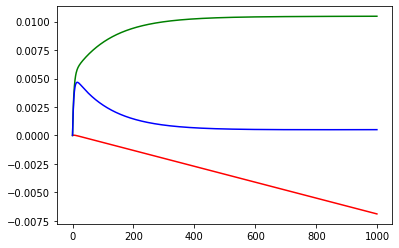

In [84]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('data.txt', delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

def z(theta,X):
  res = []
  X_t = np.transpose(X)
  for x in X_t:
    zi = x[0] * theta[0] + x[1] * theta[1] + x[2] * theta[2]
    res.append(zi)
  return res

def sigma(z):
  return 1/(1+np.exp(-z))

def J(theta,l,z):
  return l*(-np.log(sigma(z)))+(1-l)*(-np.log(1-sigma(z)))

def J_prime(z,l,xi):
  return (sigma(z)-l)*xi

def w(z,l,xi):
  return J_prime(z,l,xi)

learning_rate = 1e-6

theta_0 = 0 # -247.2에서 수렴
theta_1 = 0
theta_2 = 0

arr_t0 = []
arr_t1 = []
arr_t2 = []

X = [np.ones(len(x)),x,y]

for _ in range(1000):
  theta = [theta_0,theta_1,theta_2]
  zet = z(theta,X)
  l = label
  arr_t0.append(theta_0)
  arr_t1.append(theta_1)
  arr_t2.append(theta_2)
  for i in range(len(zet)):
    theta_0 = theta_0 - learning_rate*w(zet[i],l[i],X[0][i])
    theta_1 = theta_1 - learning_rate*w(zet[i],l[i],X[1][i])
    theta_2 = theta_2 - learning_rate*w(zet[i],l[i],X[2][i])


plt.plot(arr_t0,color='r')
plt.plot(arr_t1,color='g')
plt.plot(arr_t2,color='b')
plt.show()